In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textblob

%matplotlib inline
print("Setup complete")

Setup complete


In [3]:
df = pd.read_csv("../dataset.csv", index_col="id")
df.rename(columns={"inferred company": "company"}, inplace=True)
df['log_likes'] = np.log1p(df['likes'])
df.head()

,date,likes,content,username,media,company,log_likes
id,,,,,,,
1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,0.693147
2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,7.919720
3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,4.060443
4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,5.030438
5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,3.737670


In [4]:
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)
    
    return rmse

In [5]:
textblob_series = df["content"].apply(lambda x: textblob.TextBlob(x))

df["text_polarity"] = textblob_series.apply(lambda x: x.sentiment.polarity)
df["text_subjectivity"] = textblob_series.apply(lambda x: x.sentiment.subjectivity)

df["word_count"] = textblob_series.apply(lambda x: len(x.words))
df["char_count"] = textblob_series.apply(lambda x: len(x.raw))
df["char_density"] = df["char_count"] / df["word_count"]

In [6]:
dt_series = pd.to_datetime(df["date"]).dt

df["post_hour"] = dt_series.hour
df["weekday"] = dt_series.day_of_week

df['post_hour_sin'] = np.sin(df['post_hour'] * (2 * np.pi / 24))
df['post_hour_cos'] = np.cos(df['post_hour'] * (2 * np.pi / 24))

df["weekday_sin"] = np.sin(df["weekday"] * (2 * np.pi / 7))
df["weekday_cos"] = np.cos(df["weekday"] * (2 * np.pi / 7))

In [7]:
df["media_type"] = df["media"].apply(
    lambda x: "Photo" if "Photo" in x else "Gif" if "Gif" in x else "Video"
)

In [8]:
df.head()

,date,likes,content,username,media,company,log_likes,text_polarity,text_subjectivity,word_count,char_count,char_density,post_hour,weekday,post_hour_sin,post_hour_cos,weekday_sin,weekday_cos,media_type
id,,,,,,,,,,,,,,,,,,,
1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,0.693147,0.1750,0.325000,29,181,6.241379,0,5,0.000000,1.000000,-0.974928,-0.222521,Photo
2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,7.919720,0.0000,0.000000,10,73,7.300000,10,5,0.500000,-0.866025,-0.974928,-0.222521,Photo
3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,4.060443,-0.1000,0.100000,14,104,7.428571,19,1,-0.965926,0.258819,0.781831,0.623490,Photo
4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,5.030438,0.5000,0.900000,23,140,6.086957,11,3,0.258819,-0.965926,0.433884,-0.900969,Photo
5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,3.737670,0.0625,0.083333,28,199,7.107143,14,4,-0.500000,-0.866025,-0.433884,-0.900969,Photo


In [8]:
# test 1
X = df[["text_polarity", "text_subjectivity", "word_count", "char_count", 
        "post_hour", "weekday"]]
y = df['likes']

evaluate_model(X, y)

3522.162532290677

In [ ]:
# test 2
X = df[
    [
        "text_polarity",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour",
        "weekday",
    ]
]
y = df["likes"]

evaluate_model(X, y)

In [ ]:
# test 3
X = df[
    [
        "text_polarity",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday",
    ]
]
y = df["likes"]

evaluate_model(X, y)

In [ ]:
# test 4
X = df[
    [
        "text_polarity",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour",
        "weekday_sin",
        "weekday_cos",
    ]
]
y = df["likes"]

evaluate_model(X, y)

In [ ]:
# test 5
X = df[
    [
        "text_polarity",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
    ]
]
y = df["likes"]

evaluate_model(X, y)

In [ ]:
# test 6
X = pd.get_dummies(df, columns=["media_type"])[
    [
        "text_polarity",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Gif",
        "media_type_Video",
    ]
]
y = df["likes"]

evaluate_model(X, y)

In [10]:
# test 7
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        "text_polarity",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
    ]
]
y = df["likes"]

evaluate_model(X, y)

3623.1592702152275

In [9]:
# evaluate with linear regression
from sklearn.linear_model import LinearRegression


def evaluate_linear_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)

    return rmse

In [ ]:
evaluate_linear_model(X, y)

In [ ]:
df['company'].value_counts()

In [11]:
def evaluate_model_with_r2(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)

    return rmse

evaluate_model_with_r2(X, y)

3613.0465121757466

In [12]:
# use xgboost
from xgboost import XGBRegressor

def evaluate_xgboost_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = XGBRegressor(max_depth=5, n_estimators=250, learning_rate=0.03, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)
    
    return rmse

evaluate_xgboost_model(X, y)

3396.7626953125

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

model = XGBRegressor(max_depth=5, n_estimators=250, learning_rate=0.03, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
rmse = root_mean_squared_error(y_test, preds)

np.expm1(preds), np.expm1(y_test)

In [13]:
# df['content'].apply(lambda x: textblob.TextBlob(x).correct())

import re

emoji_pattern = re.compile(
    "[\U0001f600-\U0001f64f"  # emoticons
    "\U0001f300-\U0001f5ff"  # symbols & pictographs
    "\U0001f680-\U0001f6ff"  # transport & map
    "\U0001f1e0-\U0001f1ff"  # flags (iOS)
    "\U00002700-\U000027bf"  # dingbats
    "\U000024c2-\U0001f251"  # enclosed characters
    "]+",
    flags=re.UNICODE,
)


df['has_mention'] = df['content'].str.contains('<mention>').astype(int)
df['has_emoji'] = df['content'].apply(lambda x: bool(emoji_pattern.search(x))).astype(int)

In [ ]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        "text_polarity",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
        "has_mention",
        "has_emoji",
    ]
]
y = df["likes"]

evaluate_model(X, y)

In [ ]:
evaluate_xgboost_model(X, y)

In [14]:
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

sentiment_series = df["content"].apply(lambda x: sia.polarity_scores(x)['compound'])
df['nltk_sentiment_pos'] = df["content"].apply(lambda x: sia.polarity_scores(x)["pos"])
df['nltk_sentiment_neu'] = df["content"].apply(lambda x: sia.polarity_scores(x)["neu"])
df['nltk_sentiment_neg'] = df["content"].apply(lambda x: sia.polarity_scores(x)["neg"])


df['nltk_sentiment'] = sentiment_series

[nltk_data] Downloading package vader_lexicon to C:\Users\Neelesh
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        # "text_polarity",
        'nltk_sentiment',
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
        "has_mention",
        "has_emoji",
    ]
]
y = df["likes"]

evaluate_model(X, y)

In [ ]:
evaluate_xgboost_model(X, y)

In [ ]:
df['likes'].describe()

In [15]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        # "text_polarity",
        "nltk_sentiment",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
        "has_mention",
        "has_emoji",
    ]
]
y = df["log_likes"]

# fit to log_likes but give rmse on likes
def evaluate_model_log_likes(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    rmse = root_mean_squared_error(np.expm1(y_test), np.expm1(preds))
    
    return rmse

def evaluate_model_log_likes_xgboost(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    model = XGBRegressor(max_depth=5, n_estimators=250, learning_rate=0.03, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    rmse = root_mean_squared_error(np.expm1(y_test), np.expm1(preds))
    
    return rmse

In [ ]:
# evaluate_model_log_likes(X, y)
evaluate_model_log_likes_xgboost(X, y)

In [ ]:
df['likes'].sort_values(ascending=False).head(100)

In [16]:
from sklearn.preprocessing import LabelEncoder

le_company = LabelEncoder()
df["company_enc"] = le_company.fit_transform(df["company"])

In [ ]:
df['company_enc'].value_counts()

In [ ]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        # "text_polarity",
        "nltk_sentiment",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
        "has_mention",
        "has_emoji",
        "company_enc",
    ]
]
y = df["log_likes"]

evaluate_model_log_likes(X, y)

In [17]:
le_username = LabelEncoder()
df["username_enc"] = le_username.fit_transform(df["username"])

In [ ]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        # "text_polarity",
        "nltk_sentiment",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
        "has_mention",
        "has_emoji",
        "company_enc",
        'username_enc',
    ]
]
y = df["log_likes"]

evaluate_model_log_likes(X, y)

In [ ]:
evaluate_model_log_likes_xgboost(X, y)

In [18]:
df['num_emojis'] = df['content'].apply(lambda x: len(emoji_pattern.findall(x)))
df['num_mentions'] = df['content'].apply(lambda x: x.count('<mention>'))
df['num_hyperlinks'] = df['content'].apply(lambda x: x.count('<hyperlink>'))

In [ ]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        # "text_polarity",
        "nltk_sentiment",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
        "num_mentions",
        "num_emojis",
        "num_hyperlinks",
        "company_enc",
        "username_enc",
    ]
]
y = df["log_likes"]

evaluate_model_log_likes(X, y)

In [19]:
df['num_hashtags'] = df['content'].apply(lambda x: x.count('#'))

In [ ]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        "nltk_sentiment",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
        "num_mentions",
        "num_emojis",
        "num_hyperlinks",
        "num_hashtags",
        "company_enc",
        "username_enc",
    ]
]
y = df["log_likes"]

evaluate_model_log_likes(X, y)

In [ ]:
df.groupby('num_mentions')['likes'].agg(['mean', 'count'])

In [ ]:
evaluate_model_log_likes_xgboost(X, y)

In [20]:
df['has_hashtags'] = df['num_hashtags'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        "nltk_sentiment",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
        "has_mention",
        "has_emoji",
        "num_emojis",
        "has_hashtags",
        "num_hashtags",
        "company_enc",
        "username_enc",
    ]
]
y = df["log_likes"]

evaluate_model_log_likes(X, y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

param_dist = {
    "max_depth": [3, 4, 5, 6, 7, 8],
    "n_estimators": [100, 150, 200, 250, 300],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
}

X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        "nltk_sentiment",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
        "has_mention",
        "has_emoji",
        "num_emojis",
        "has_hashtags",
        "num_hashtags",
        "company_enc",
        "username_enc",
    ]
]
y = df["log_likes"]

xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=20, scoring="neg_root_mean_squared_error",
    cv=3, verbose=1, n_jobs=-1, random_state=42
)
random_search.fit(X, y)

print("Best params:", random_search.best_params_)
print("Best RMSE:", -random_search.best_score_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf_param_dist = {
    "n_estimators": [100, 150, 200, 250, 300],
    "max_depth": [3, 5, 7, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
}

rf = RandomForestRegressor(random_state=42)
rf_random_search = RandomizedSearchCV(
    rf, param_distributions=rf_param_dist, n_iter=20, scoring="neg_root_mean_squared_error",
    cv=3, verbose=1, n_jobs=-1, random_state=42
)
rf_random_search.fit(X, y)

print("Best RF params:", rf_random_search.best_params_)
print("Best RF RMSE:", -rf_random_search.best_score_)

In [ ]:
best_model = random_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

rmse = root_mean_squared_error(np.expm1(y_test), np.expm1(preds))
print("Final RMSE on test set:", rmse)

# plot most important features
import matplotlib.pyplot as plt
importances = best_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()


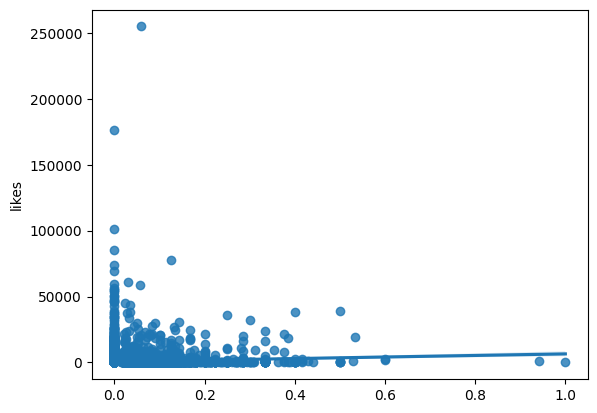

In [22]:
emoji_density = df['num_emojis'] / df['word_count']
sns.regplot(x=emoji_density, y=df['likes'])
df['emoji_density'] = emoji_density

In [ ]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        "nltk_sentiment",
        "text_subjectivity",
        "word_count",
        "char_density",
        "post_hour_sin",
        "post_hour_cos",
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
        "has_mention",
        "has_emoji",
        "num_emojis",
        "has_hashtags",
        "num_hashtags",
        "company_enc",
        "username_enc",
    ]
]
y = df["log_likes"]

evaluate_model_log_likes(X, y)

In [23]:
df['is_morning_post'] = df['post_hour'].apply(lambda x: 1 if 5 <= x < 12 else 0)
df['is_afternoon_post'] = df['post_hour'].apply(lambda x: 1 if 12 <= x < 17 else 0)
df['is_evening_post'] = df['post_hour'].apply(lambda x: 1 if 17 <= x < 21 else 0)
df['is_night_post'] = df['post_hour'].apply(lambda x: 1 if 21 <= x < 5 else 0)

In [ ]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        "nltk_sentiment",
        "text_subjectivity",
        "word_count",
        "char_density",
        'is_morning_post',
        'is_afternoon_post',
        'is_evening_post',
        'is_night_post',
        "weekday_sin",
        "weekday_cos",
        "media_type_Photo",
        "media_type_Video",
        "has_mention",
        "has_emoji",
        "num_emojis",
        "has_hashtags",
        "num_hashtags",
        "company_enc",
        "username_enc",
    ]
]
y = df["log_likes"]

evaluate_model_log_likes(X, y)

In [24]:
df['is_weekend_post'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [23]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        "nltk_sentiment",
        "text_subjectivity",
        "word_count",
        "char_density",
        "is_morning_post",
        "is_afternoon_post",
        "is_evening_post",
        "is_night_post",
        'weekday',
        # 'is_weekend_post',
        "media_type_Photo",
        "media_type_Video",
        "has_mention",
        "has_emoji",
        "num_emojis",
        "has_hashtags",
        "num_hashtags",
        "company_enc",
        "username_enc",
    ]
]
y = df["log_likes"]

evaluate_model_log_likes(X, y)

3003.3312029398417

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_test)
rmse = root_mean_squared_error(np.expm1(y_test), np.expm1(preds))
rmse

2981.675367427843

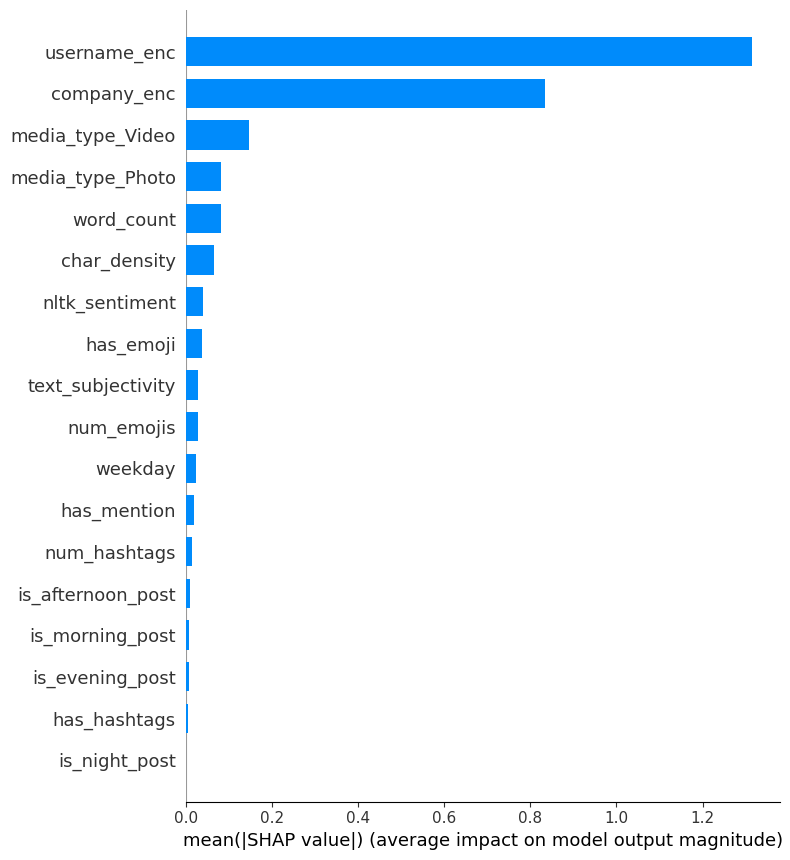

In [25]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test.sample(100, random_state=42))
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer


def add_top_tfidf_features(df, text_col, target_col, top_n=10, max_features=1000):
    # Step 1: TF-IDF Vectorization
    tfidf = TfidfVectorizer(max_features=max_features, stop_words="english")
    X_tfidf = tfidf.fit_transform(df[text_col])
    feature_names = tfidf.get_feature_names_out()

    # Step 2: Compute correlation of each word with target
    tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
    tfidf_df[target_col] = df[target_col].values

    correlations = tfidf_df.corr(numeric_only=True)[target_col].dropna()
    top_words = (
        correlations.abs().sort_values(ascending=False).head(top_n + 1).index.tolist()
    )

    # Step 3: Add binary columns for top words
    for word in top_words:
        if word == target_col:
            continue
        
        df[f"has_word_{word}"] = (
            df[text_col].str.contains(rf"\b{word}\b", case=False).astype(int)
        )

    return df, top_words

In [26]:
df, _ = add_top_tfidf_features(df, "content", "log_likes", top_n=10, max_features=1000)

In [27]:
# for all columns that start with 'has_word_'
has_word_cols = [col for col in df.columns if col.startswith("has_word_")]
# print number of tweets that contain each word
for col in has_word_cols:
    print(f"{col}: {df[col].sum()} tweets contain this word")

has_word_cisco: 373 tweets contain this word
has_word_trump: 417 tweets contain this word
has_word_19: 397 tweets contain this word
has_word_covid: 354 tweets contain this word
has_word_president: 416 tweets contain this word
has_word_aaa: 114 tweets contain this word
has_word_nigeria: 78 tweets contain this word
has_word_arm: 89 tweets contain this word
has_word_learn: 671 tweets contain this word
has_word_buhari: 63 tweets contain this word


In [36]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[
    [
        "nltk_sentiment",
        "text_subjectivity",
        "word_count",
        "char_density",
        "is_morning_post",
        "is_afternoon_post",
        "is_evening_post",
        "is_night_post",
        "weekday",
        # 'is_weekend_post',
        "media_type_Photo",
        "media_type_Video",
        "has_mention",
        "has_emoji",
        "num_emojis",
        "has_hashtags",
        "num_hashtags",
        "company_enc",
        "username_enc",
    ] + has_word_cols
]
y = df["log_likes"]

evaluate_model_log_likes(X, y)

2990.6016912748078

In [41]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

feature_cols = [
    "nltk_sentiment",
    "text_subjectivity",
    "word_count",
    "char_density",
    "is_morning_post",
    "is_afternoon_post",
    "is_evening_post",
    "is_night_post",
    "weekday",
    "media_type_Photo",
    "media_type_Video",
    "has_mention",
    "has_emoji",
    "num_emojis",
    "has_hashtags",
    "num_hashtags",
] + has_word_cols

X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[feature_cols + ["company", "username"]]
y = df["log_likes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

te = TargetEncoder(cols=["company", "username"])
X_train_enc = te.fit_transform(X_train, y_train)
X_test_enc = te.transform(X_test)

# Fit and evaluate model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_enc, y_train)

preds = model.predict(X_test_enc)
test_rmse = root_mean_squared_error(np.expm1(y_test), np.expm1(preds))

train_rmse = root_mean_squared_error(np.expm1(y_train), np.expm1(model.predict(X_train_enc)))
train_rmse

2688.27515922274

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

num_bins = 5
like_bins = np.quantile(df['likes'], np.linspace(0, 1, num_bins + 1))
like_bins = np.unique(like_bins)
df['likes_category'] = np.digitize(df['likes'], bins=like_bins[1:-1], right=True)

print('Category counts:', df['likes_category'].value_counts().sort_index())

X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[feature_cols + ["company", "username"]]
y_cat = df['likes_category']

te = TargetEncoder(cols=["company", "username"])
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)
X_train_enc = te.fit_transform(X_train, y_train)
X_test_enc = te.transform(X_test)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_enc, y_train)
y_pred = clf.predict(X_test_enc)

print(classification_report(y_test, y_pred, digits=3))

Category counts: likes_category
0    3661
1    3327
2    3429
3    3453
4    3461
Name: count, dtype: int64
              precision    recall  f1-score   support

           0      0.940     0.814     0.873       732
           1      0.705     0.841     0.767       666
           2      0.567     0.671     0.615       686
           3      0.539     0.527     0.533       691
           4      0.797     0.637     0.708       692

    accuracy                          0.698      3467
   macro avg      0.710     0.698     0.699      3467
weighted avg      0.713     0.698     0.701      3467



In [44]:
X = pd.get_dummies(df, columns=["media_type"], drop_first=True)[feature_cols + ["company", "username"]]
y_reg = df["log_likes"]
y_cat = df["likes_category"]

te = TargetEncoder(cols=["company", "username"])
X_train, X_test, y_train_reg, y_test_reg, y_train_cat, y_test_cat = train_test_split(
    X, y_reg, y_cat, test_size=0.2, random_state=42, stratify=y_cat
)
X_train_enc = te.fit_transform(X_train, y_train_reg)
X_test_enc = te.transform(X_test)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_enc, y_train_cat)

train_class_pred = clf.predict(X_train_enc)
test_class_pred = clf.predict(X_test_enc)

X_train_ens = X_train_enc.copy()
X_test_ens = X_test_enc.copy()
X_train_ens["class_pred"] = train_class_pred
X_test_ens["class_pred"] = test_class_pred

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_ens, y_train_reg)
preds = reg.predict(X_test_ens)
rmse = root_mean_squared_error(np.expm1(y_test_reg), np.expm1(preds))
print(f"Ensemble RMSE (classification output as feature): {rmse:.4f}")
print(f"Ensemble Train RMSE: {root_mean_squared_error(np.expm1(y_train_reg), np.expm1(reg.predict(X_train_ens))):.4f}")

Ensemble RMSE (classification output as feature): 2636.4806
Ensemble Train RMSE: 2752.5533


<Axes: xlabel='id', ylabel='log_likes'>

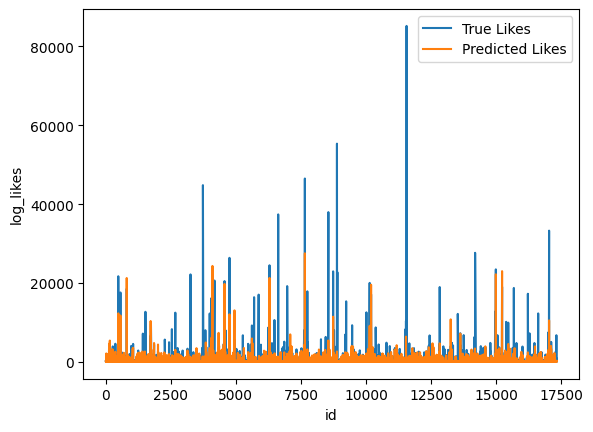

In [40]:
sns.lineplot(x=y_test_reg.index, y=np.expm1(y_test_reg), label='True Likes')
sns.lineplot(x=y_test_reg.index, y=np.expm1(preds), label='Predicted Likes')